In [24]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
%matplotlib inline

In [2]:
# load results
#results = pickle.load( open( "results_exp_mnist_low_sample.p", "rb" ) )
# if the file is saved from python 2
results = pickle.load(open("results_exp_mnist_full.p", "rb"), encoding='latin1')
deltalist = results[0]
powerlist = results[1]
powerlist_oracle = results[2]

cdflist = results[3]
cdflist_oracle = results[4]

powerlist_x = results[5]
cdflist_x = results[6]

powerlistT = np.array(powerlist).T

print(powerlistT)

print(powerlist_x)

[[ 0.022  0.128  0.332  0.208  0.598  0.162  0.644  0.49   0.502  0.8  ]
 [ 0.026  0.12   0.336  0.206  0.806  0.71   0.81   0.614  0.692  0.806]
 [ 0.046  0.104  0.252  0.204  0.778  0.746  0.716  0.888  0.878  0.964]
 [ 0.058  0.08   0.294  0.208  0.724  0.88   0.846  0.904  0.81   0.976]
 [ 0.048  0.076  0.302  0.262  0.774  0.672  0.866  0.972  0.866  0.982]]
[0.02, 0.089999999999999997, 0.060000000000000005, 0.13, 0.14000000000000001, 0.26000000000000001, 0.23000000000000001, 0.38, 0.12, 0.28000000000000003]


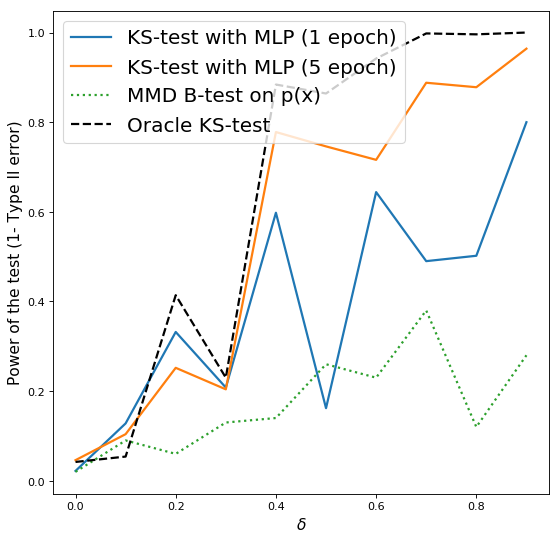

In [21]:
#plot figures
fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

num_epoch = 1
legendslist=[]
# plot the comparison
for ind,item in enumerate(powerlistT):
    if ind ==0 or ind ==2:
        plt.plot(deltalist,item,linewidth=2)
        legendslist.append('KS-test with MLP ('+repr(num_epoch)+' epoch)')
    num_epoch += 2
    


plt.plot(deltalist,powerlist_x,linewidth=2,linestyle=':')
plt.plot(deltalist,powerlist_oracle,linewidth=2, color='k',linestyle='--')

legendslist.append('MMD B-test on p(x)')
legendslist.append('Oracle KS-test')
plt.xlabel('$\delta$', fontsize=14)
plt.ylabel('Power of the test (1- Type II error)',fontsize=14)
plt.legend(legendslist, loc='best',fontsize=18)

#plt.title('Comparing the power at 0.05 level of significance',fontsize=14)

plt.show()

fig.savefig("Hypothesis-Testing-power-as-we-train-more.pdf", bbox_inches='tight')

In [4]:
# plot the QQ-plot for different levels

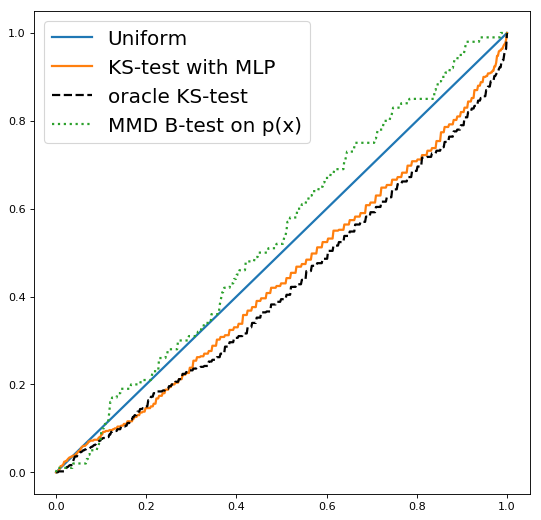

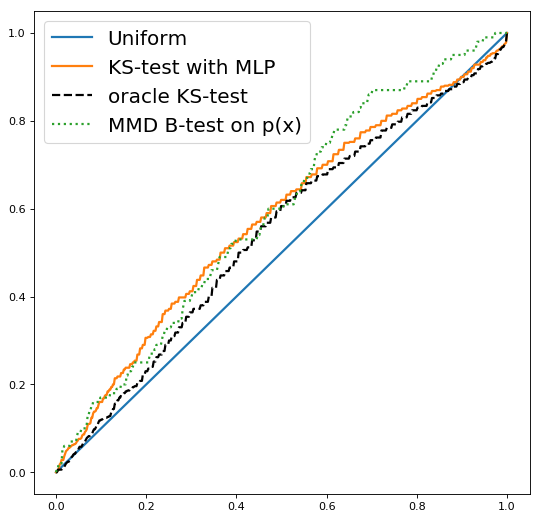

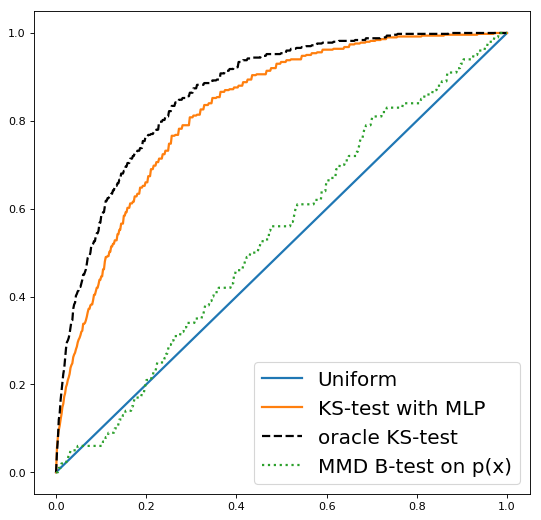

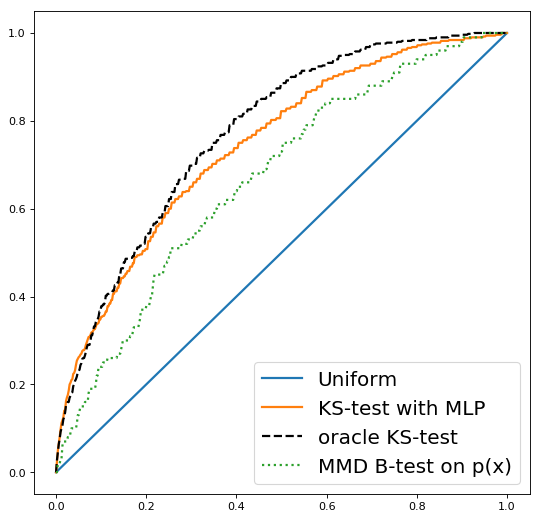

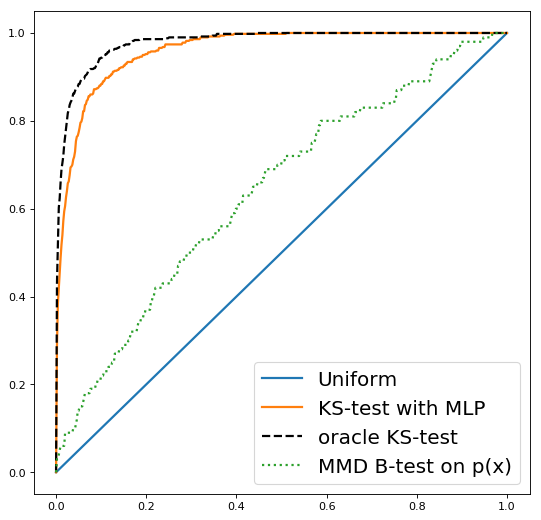

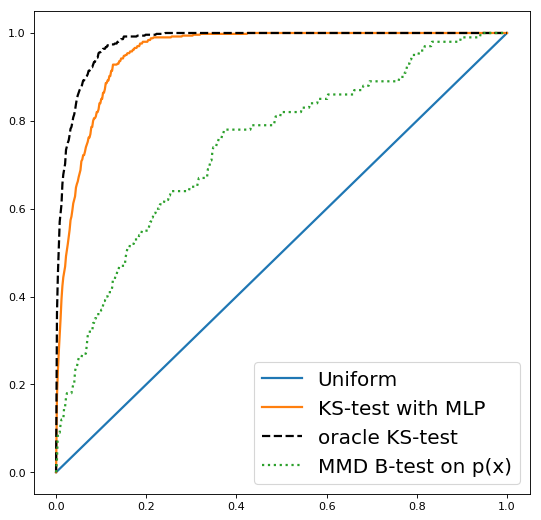

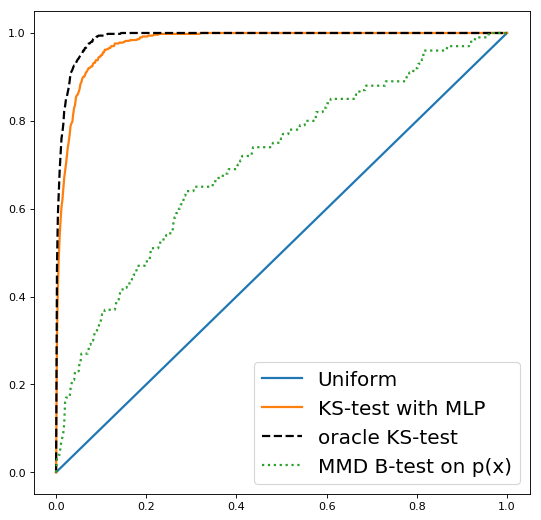

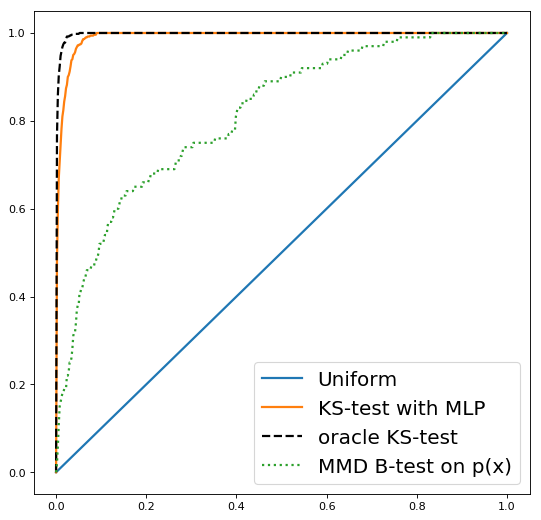

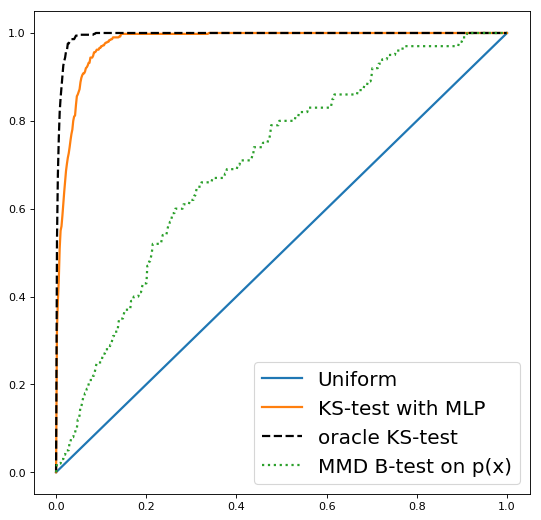

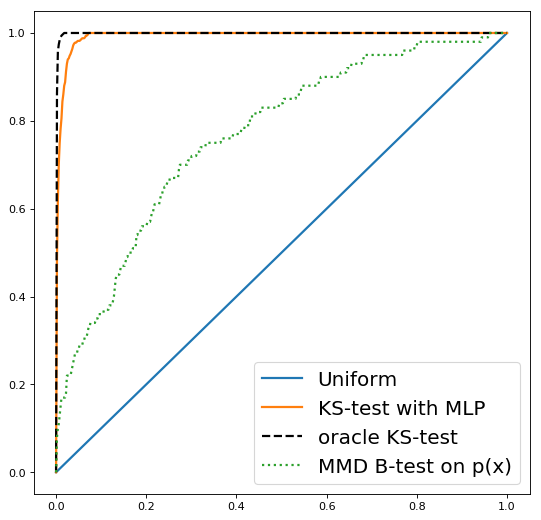

In [22]:
for (delta,item1,item2,item3) in zip(deltalist,cdflist,cdflist_oracle,cdflist_x):
    fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    
    delta = int(delta*10)
    xx=  np.linspace(0, 1, num=500)

    cdfpval = item1
    cdfpval_gnd = item2
    cdfpval_x = item3
    plt.plot(xx, xx,linewidth=2)
    plt.plot(xx, cdfpval(xx),linewidth=2)
    plt.plot(xx, cdfpval_gnd(xx),linewidth=2,color='k',linestyle='--')
    plt.plot(xx, cdfpval_x(xx),linewidth=2,linestyle=':')

    plt.legend(['Uniform', 'KS-test with MLP', 'oracle KS-test','MMD B-test on p(x)'], loc='best',fontsize=18)
    #plt.title('CDF of p-values', fontsize=18)
    fig.savefig("Hypothesis-Testing"+"delta-0"+repr(delta)+".pdf", bbox_inches='tight')

In [58]:
results = pickle.load(open("results_exp_benchmarking-jan29.p", "rb"), encoding='latin1')
#ToPickle = [alpha_range, nlist, num_runs, methods_name, allresults]
#allresults[(alpha,n)].append([results,p_P,p_Q])
#results are {"acc_list": acc_list, "wt_list": wt_list}
# acc_list.append([acc_weighted,C,Cp])

alpha_range = results[0]
nlist = results[1]
num_runs = results[2]

methods_name = results[3]
allresults = results[4]

MSE_vs_n = {}
STD_vs_n = {}

ACC_vs_n = {}
ACCSTD_vs_n = {}

for alpha in alpha_range:
    for name in methods_name:
        MSE_vs_n[(alpha,name)] = []
        STD_vs_n[(alpha,name)] = []
        ACC_vs_n[(alpha,name)] = []
        ACCSTD_vs_n[(alpha,name)] = []
    for n in nlist[:5]:
        tmp = allresults[(alpha,n)]
        print(n)
        
        rep_data={}
        for name in methods_name:
            rep_data[("estimation",name)] = []
            rep_data[("testacc",name)] = []
            
        for exp_results in tmp: # enumerate over repeats
            p_P = exp_results[1]
            p_Q = exp_results[2]
            w0 = np.array(p_Q)/np.array(p_P)
            tmp1 = exp_results[0]
            wt_list = tmp1["wt_list"]
            acc_list = tmp1["acc_list"]
            for (wt,acc,name) in zip(wt_list,acc_list,methods_name):
                rep_data[("estimation",name)].append(np.sum((wt-w0)**2))
                rep_data[("testacc",name)].append(acc[0])
                print(name, " MSE", np.sum((wt-w0)**2), "ACC", acc[0])
        for name in methods_name:
            MSE_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("estimation",name)])))
            STD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("estimation",name)])))
            ACC_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("testacc",name)])))
            ACCSTD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("testacc",name)])))




500
unweighted  MSE 0.7711010881126771 ACC 0.7832031
BBSE  MSE 1.1495628181081394 ACC 0.78515625
KMM-TarS  MSE 0.7144996099876766 ACC 0.80859375
unweighted  MSE 0.762506491561426 ACC 0.8105469
BBSE  MSE 1.0146993076075597 ACC 0.7734375
KMM-TarS  MSE 0.7342658635082597 ACC 0.82421875
unweighted  MSE 0.6583577185034222 ACC 0.7578125
BBSE  MSE 1.0012815043390235 ACC 0.78515625
KMM-TarS  MSE 0.938084515326957 ACC 0.8027344
unweighted  MSE 0.7960666780418233 ACC 0.7949219
BBSE  MSE 1.0299966683705253 ACC 0.78125
KMM-TarS  MSE 1.1887683804623226 ACC 0.81640625
unweighted  MSE 1.409933536788999 ACC 0.8515625
BBSE  MSE 1.1566613107374217 ACC 0.84375
KMM-TarS  MSE 1.5317790274618133 ACC 0.85546875
1000
unweighted  MSE 0.4598385874340265 ACC 0.87597656
BBSE  MSE 0.5571347027328437 ACC 0.8876953
KMM-TarS  MSE 0.713107164700054 ACC 0.89160156
unweighted  MSE 0.9936150365586895 ACC 0.86621094
BBSE  MSE 0.46528781633294897 ACC 0.86328125
KMM-TarS  MSE 1.2215666334759572 ACC 0.8730469
unweighted  MSE

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


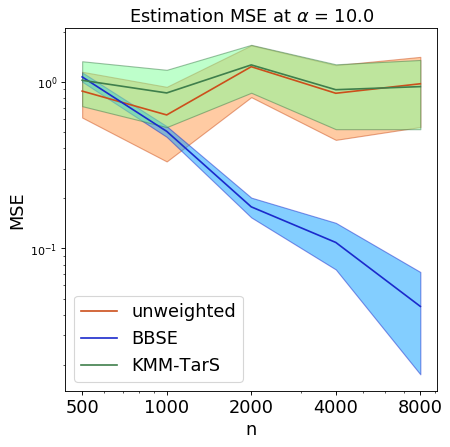

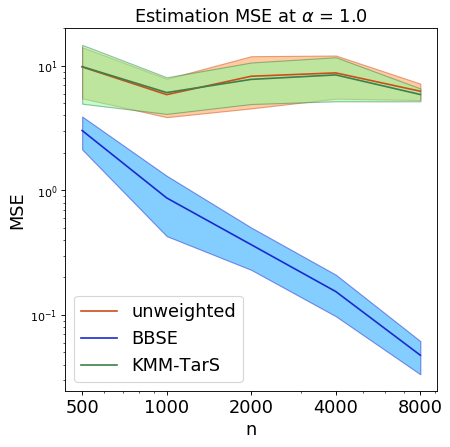

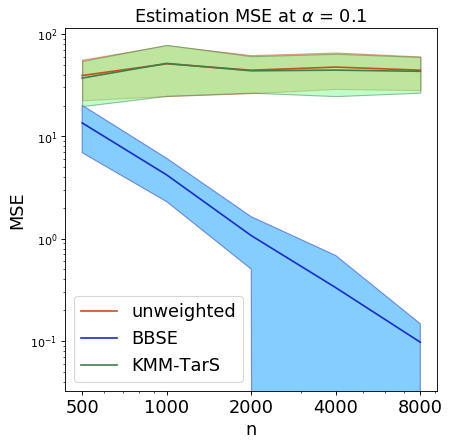

In [75]:
colorlist=['#CC4F1B','#1B2ACC','#3F7F4C']
facecolorlist =['#FF9848','#089FFF','#7EFF99']
for alpha in alpha_range:
    plt.clf()
    fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.hold(1)
    
    x=nlist[:5];
    for i,name in enumerate(methods_name):
        y=np.array(MSE_vs_n[(alpha,name)])
        error = np.array(STD_vs_n[(alpha,name)])
        plt.plot(x, y, 'k', color=colorlist[i])
        plt.fill_between(x, y-error, y+error,
            alpha=0.5, edgecolor=colorlist[i], facecolor=facecolorlist[i])
    
    plt.legend(methods_name,fontsize=16)
    plt.xlabel("n", fontsize=16)  
    plt.ylabel("MSE", fontsize=16)
    plt.xscale('log')
    plt.xticks(nlist,nlist,fontsize=16)
    plt.yscale('log')
    plt.title(r"Estimation MSE at $\alpha$ = "+repr(alpha), fontsize=16)
    plt.show()


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


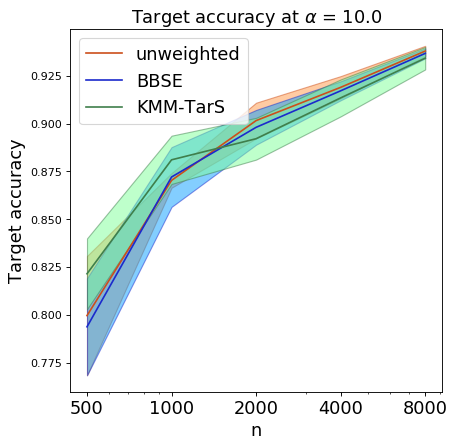

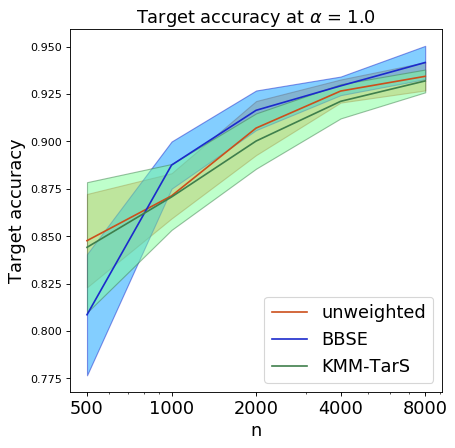

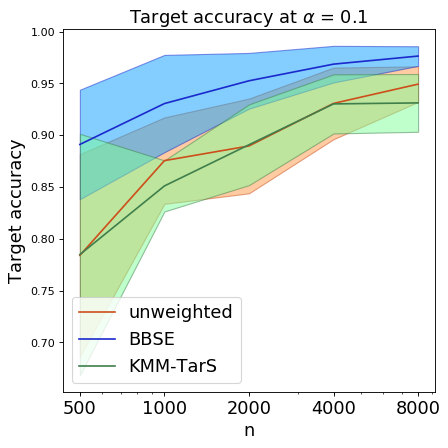

In [74]:
colorlist=['#CC4F1B','#1B2ACC','#3F7F4C']
facecolorlist =['#FF9848','#089FFF','#7EFF99']
for alpha in alpha_range:
    plt.clf()
    fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.hold(1)
    
    x=nlist[:5];
    for i,name in enumerate(methods_name):
        y=np.array(ACC_vs_n[(alpha,name)])
        error = np.array(ACCSTD_vs_n[(alpha,name)])
        plt.plot(x, y, 'k', color=colorlist[i])
        plt.fill_between(x, y-error, y+error,
            alpha=0.5, edgecolor=colorlist[i], facecolor=facecolorlist[i])
    
    plt.legend(methods_name,fontsize=16)
    plt.xlabel("n", fontsize=16)  
    plt.ylabel("Target accuracy", fontsize=16)
    plt.xscale('log')
    plt.xticks(nlist,nlist,fontsize=16)
    #plt.yscale('log')
    plt.title(r"Target accuracy at $\alpha$ = "+repr(alpha), fontsize=16)
    plt.show()
